# API Pull Automation and Data Visualization

In [11]:
#Code from CoinMarketCap API documentation

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4ec6e869-6b37-4e00-8db9-6e18099c6dbe',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#If you encounter an error pulling data, put "--NotebookApp.iopub_data_rate_limit=1e10"
#Into the Anaconda prompt

{'status': {'timestamp': '2023-06-25T07:37:57.087Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 10299}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10250, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [19]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [14]:
#Normalize the data
df = pd.json_normalize(data['data'])

#Add timestamp column
df['timestamp'] = pd.to_datetime('now')

In [23]:
#Function to automate the data pull into CSV
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4ec6e869-6b37-4e00-8db9-6e18099c6dbe',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #Normalize the data
    df = pd.json_normalize(data['data'])

    #Add timestamp column
    df['timestamp'] = pd.to_datetime('now')
    df
    
    #Transfer data into CSV file
    if not os.path.isfile(r'/Users/vanessa/Downloads/Crypto API Pull/API.csv'):
        df.to_csv(r'/Users/vanessa/Downloads/Crypto API Pull/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/vanessa/Downloads/Crypto API Pull/API.csv', mode = 'a', header = False)


In [24]:
import os
from time import time
from time import sleep

#CoinMarketCap has a daily limit of 333 credits
for i in range(333):
    api_runner()
    print("API Runner completed successfully")
    sleep(60) #Sleep for 1 minute
exit()

{'status': {'timestamp': '2023-06-25T07:54:14.090Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 10299}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10250, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2023-06-25T07:55:14.408Z', 'error_code': 0, 'error_message': None, 'elapsed': 65, 'credit_count': 1, 'notice': None, 'total_count': 10299}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10250, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [83]:
df2 = pd.read_csv(r'/Users/vanessa/Downloads/Crypto API Pull/API.csv')

In [84]:
#Average percent changes and group based on cryptocurrency
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [79]:
df4 = df3.stack()
df5 = df4.to_frame(name ='percent_change')

#Change index to dataframe index object
index = pd.Index(range(int(df5.count()['percent_change'])))
df6 = df5.set_index(index)
df6 = df5.reset_index()

#Change column name
df7 = df6.rename(columns={'level_1': 'time_period'})

In [80]:
df7['time_period'] = df7['time_period'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

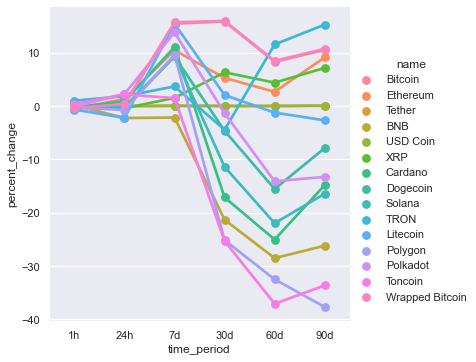

In [81]:
#Plot percent change for various time periods
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'time_period', y = 'percent_change', hue ='name', data = df7, kind ='point')

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

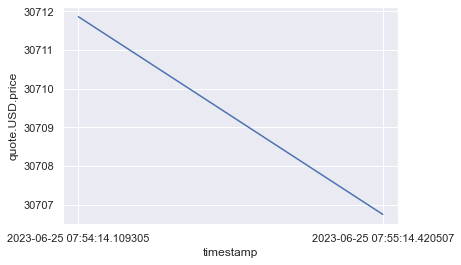

In [77]:
#Create new dataframe containing Bitcoin data only
df8 = df2[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")

#Plot change in price over time
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)